### Antes de empezar:
- Debes ejecutar la siguiente celda para poder jugar con lo que tenemos preparado
- Para ejecutar una celda la tienes que seleccionar y pulsar: Ctrl + Enter (Shift + Enter también vale)
- Cuando la hayas ejecutado, para iniciar el modo presentación teclea: alt + R
- Con las teclas de AvPág y RePág, adelantas o retrocedes en la presentación
- En Chrome puedes habilitar el modo a pantalla completa con: F11
- Para salir del modo presentación vuelve a teclear: alt + R

In [ ]:
# Módulos (o librerías, o paquetes) que hay que cargar previamente
# Si no ejecutas esta celda no vas a poder interactuar con las celdas que vendrán a continuación
from IPython.display import IFrame
from IPython.display import Image
from IPython.display import Audio
from IPython.display import YouTubeVideo
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:85% !important; }</style>"))
js = "<script>hoy = new Date();var eta_ms = new Date(hoy.getFullYear(), hoy.getMonth(), hoy.getDate(), 19, 13).getTime() - Date.now();var timeout = setTimeout(function(){alert('Héctor, quizá podrías dejar tranquilita ya a la gente, ¿no? Gracias :)');}, eta_ms);</script>"
display(HTML(js))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as ml
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive
from scipy.io.wavfile import read # sirve para leer ficheros WAV: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html#module-scipy.io.wavfile
from scipy import signal # sirve para filtros
import pywt # sirve para la transformada de wavelet: pip install PyWavelets
import pandas as pd
import urllib.request
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
# %load_ext watermark
# %watermark -v -m -p ipywidgets,matplotlib,numpy,pandas,rise,jupyter,traitlets,reveal
class displayhoriz(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">{1}</div>"""
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)


<p float="left">
    <a href="http://www.upv.es">
        <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/logos/logo_upv.png" style="height:2em; margin: 0px 1em"/> </a>
    <a href="http://www.etsid.upv.es">
        <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/logos/logo_etsid.png"/ style="height:2em; margin: 0px 1em"/> </a>
    <a href="http://www.cmt.upv.es">
        <img align="left" src="https://hcliment.webs.upv.es/docencia/dar/figs/logos/logo_cmt.png" style="height:2em; margin: 0px 1em"/> </a>
</p>
<br><br><br><br>
<h1>Tema 0.- Presentación de la asignatura</h1>
<br>
<ul>
    <li>Diagnóstico por análisis del ruido</li>
    <li>Máster en Ingeniería del Mantenimiento</li>
    <li>Curso: 1 - Cuatrimestre: B</li>
    <li>4.5 créditos: 2.5 de teoría y 2 de prácticas (aula y laboratorio)</li>
    <li>Héctor Climent - hcliment@mot.upv.es</li>
</ul>    

<h2>Objetivos:</h2>
<ul>
<li>Revisar/conocer los conceptos y el lenguaje de la acústica</li>
<li>Familiarizarse con los fenómenos de propagación de ondas en fluidos, su caracterización y su medida</li>
<li>Conocer las principales características de las fuentes sonoras y sus mecanismos de emisión</li>
<li>Conocer las posibilidades de aplicación de la acústica al diagnóstico de maquinaria</li>
</ul>

<h2>Relación con otras asignaturas:</h2>
<ul>
<li>Curso: 1 - cuatrimestre: A</li>
    <ul>
        <li>Análisis de Vibraciones</li>
    </ul>
<li>Curso: 1 - cuatrimestre: B</li>
    <ul>
        <li>Técnicas de Monitorizado</li>
        <li>Mantenimiento de Máquinas e Instalaciones Térmicas</li>
        <li>Mantenimiento de Máquinas e Instalaciones Eléctricas</li>
        <li>Mantenimiento de Sistemas Mecánicos</li>
    </ul>
</ul>

<h2>Contenido de la asignatura:</h2>
<ul>
    <li>Fundamentos</li>
    <ul>
        <li>Tema 1.- Conceptos básicos</li>
        <li>Tema 2.- Cuantificación y percepción del campo acústico</li>
        <li>Práctica: Modelado de campos acústicos</li>
    </ul>
    <li>Medida, análisis y procesado de señales acústicas</li>
    <ul>
        <li>Tema 3.- Medidas acústicas: instrumentación</li>
        <li>Tema 4.- Análisis temporal y frecuencial</li>
        <li>Práctica: Visita a la cámara anecoica</li>
        <li>Tema 5.- Técnicas tiempo-frecuencia y análisis cepstral</li>
    </ul>
    <li>Fuentes sonoras y emisión acústica</li>
    <ul>
        <li>Tema 6.- Fuentes sonoras primarias</li>
        <li>Práctica: Acústica en conductos. Diseño de silenciadores</li>
    </ul>
    <li>Aplicaciones al diagnóstico</li>
    <ul>
        <li>Práctica: Presentación de casos prácticos</li>
    </ul>
</ul>

<h2>Lugares de interés:</h2>
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/CamaraAnecoicaDMMT.jpg" style="float:right;width:40%;padding:2%;">
<ul>
    <li>Clases de teoría: aula <a href="https://openmaps.upv.es/?locate=V.7B.3.017">S32</a>, edificio 7B</li>
    <li>Clases prácticas: aula <a href="https://openmaps.upv.es/?locate=V.8P.1.009">Informática 3</a> del edificio 8P</li>
    <li>Tutorías (modalidad "a demanda"): edificio <a href="https://openmaps.upv.es/?locate=V.6D.0.069">6D</a></li>
    <li>Práctica en la <a href="https://openmaps.upv.es/?locate=V.5K.0.006">cámara anecoica</a> del edificio 5K</li>
</ul>


<h2>Bibliografía (suficiente):</h2>
<ul>
    <li>Transparencias de clase.</li>
</ul>
<h2>Bibliografía (para profundizar):</h2>
<ul>
    <li>L. E. Kinsler, A. R. Frey (2000) Fundamentals of acoustics, 4th ed. New York, Wiley.</li>
    <li>M. Recuero (1999) Ingeniería acústica. Madrid, Paraninfo.</li>
    <li>L. L. Beranek, I. L. Vér (eds.) (1992) Noise and vibration control engineering: Principles and applications. New York, Wiley.</li>
    <li>R. H. Lyon (1987) Machinery noise and diagnostics. Boston, Butterworths.</li>
    <li>J. Lighthill (1978) Waves in fluids. Cambridge, University Press.</li>
    <li>M. L. Munjal (1987) Acoustics of ducts and mufflers. New York, Wiley.</li>
</ul>

<h2>Sistema de evaluación:</h2>
<ul>
    <li>Asistencia y aprovechamiento en clases prácticas - 15%</li>
    <li>Elaboración de un trabajo individual (en formato presentación) sobre una posible aplicación del diagnóstico por análisis del ruido - 30%</li>
    <li>Examen de carácter práctico (con ordenador y Notebook) - 25%</li>
    <li>Examen de carácter teórico (con ordenador y test en poliformaT) - 30%</li>
</ul>
<center>
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Evaluacion.jpg" style="width:60%;padding:2%;">
<small>Fuente: poliformaT de la asignatura</small>
</center>

<h2>Planificación:</h2>
<ul>
    <li>Teoría: Lunes de 17:00 a 19:15</li>
    <li>Prácticas:</li>
    <ul>
        <li>Práctica 1: Campos acústicos (martes 15/marzo; 11:00-14:00 o 15:00-18:00)</li>
        <li>Práctica 2: Visita a la cámara anecoica (martes 26/abril; 11:00-14:00 o 15:00-18:00)</li>
        <li>Práctica 3: Diseño de silenciadores (martes 31/mayo; 11:00-14:00 o 15:00-18:00)</li>
        <li>Práctica 4: Casos prácticos (martes 7/junio; 11:00-14:00 o 15:00-18:00)</li>
</ul>
<center>
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Planificacion2022.jpg" style="width:50%;padding:2%;">
</center>

<h2>FAQs</h2>

<h3>¿Qué voy a aprender?</h3>
<ul>
    <li>En diez palabras: "identificar fallos en máquinas a partir del ruido que hacen"</li>
</ul>

<h3>¿Qué voy a necesitar?</h3>
<ul>
    <li>La asistencia a clase va a ayudar bastante.</li>
    <li>Algo de interés y voluntad por aprender.</li>
    <li>Un ordenador; en principio el del aula está bien pero si lo prefieres puedes usar uno tuyo.</li>
    <li>Unos auriculares para conectar al ordenador.</li>
</ul>

<h3>¿No tendrás un ejemplo de cómo ha de ser el trabajo individual?</h3>
<ul>
    <li>Sí, claro. Hay un ejemplo en poliformaT que puedes mirar, aunque también os lo presentaré en clase más adelante</li>
</ul>

<h3>¿Tienes algo más de información acerca del trabajo individual?</h3>

Sí, claro:
<ul>
    <li>Eliges una máquina que produzca ruido y lo registras con, por ejemplo, un teléfono móvil.</li>
    <li>La idea es analizar ese ruido para identificar características relevantes sobre el funcionamiento de la máquina.</li>
    <li>Es interesante medir la máquina en distintas condiciones de funcionamiento (estacionario, transitorio, ...).</li>
    <li>Hacer varias medidas (de alrededor de 5 segundos) también puede ser una buena idea.</li>
    <li>En clase veremos cómo analizar esa información.</li>
    <li>Cuando lleguemos a los temas finales, empezaremos a dejar tiempo en clase para que avancéis y me preguntéis dudas.</li>
    <li>Hacia final de curso tendréis que preparar una presentación de PowerPoint que presentaréis oralmente en clase.</li>
    <li>Pensad en unos 15 minutos de duración y unos 5 minutos de turno de preguntas.</li>
</ul>

<h3>¿Y si no tengo posibilidad de acceder a ninguna máquina que haga ruido?</h3>

<p>No pasa nada. Puedes buscar audios en Internet y trabajar con ellos. Algunas páginas interesantes:</p>
<ul>
    <li><a href="https://www.freesound.org">Freesound.org</a> : Es necesario registrarse para poder descargar los audios pero no para oírlos.</li>
    <li><a href="https://www.youtube.com">Youtube</a> : Es necesario descargar el vídeo y extraer el audio de alguna forma.</li>
</ul>

<h3>¿Algún caso práctico?</h3>
<ul>
    <li>El Instituto Fraunhofer: Institute for Digital Media Technology <a href="https://www.idmt.fraunhofer.de/en/business_units/ima.html">IDMT</a></li>
    <li>3D Signals es una start-up israelí que desarrolla <em>IoT devices</em> que "escuchan" a las máquinas.</li>
</ul>

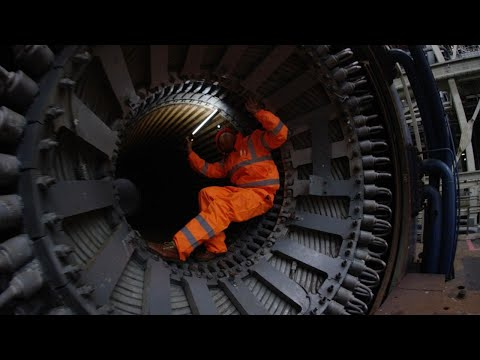

In [ ]:
# 3DSignals Listens to Factories
vid = YouTubeVideo("WSjnbrGAjUU")
display(vid)

<h3>No parece que estés usando Powerpoint. ¿Qué es esto?</h3>
<ul>
    <li>Es un Notebook de <a href="https://jupyter.org/">Jupyter</a>. De su página web: "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more."</li>
    <li>Uno de los lenguajes de programación que se pueden usar en el Notebook es <a href="https://www.python.org/">python</a>. De su página web: "Python is a programming language that lets you work quickly and integrate systems more effectively.".</li>
</ul>

<h3>¿Tengo que estar asustado?</h3>
<ul>
    <li>No. De verdad.</li>
</ul>
<h3>¿Has usado siempre esto?</h3>
<ul>
    <li>No. Empecé con Powerpoint + Matlab. Este es el tercer año seguido con Jupyter Notebook. Que continúe o no dependerá de vuestro feedback.</li>
</ul>
<h3>Controlo Matlab, ¿puedo hacer mis ejercicios y trabajo individual con Matlab?</h3>
<ul>
    <li>Sí, claro. Las herramientas están para ayudarnos a realizar tareas. Si: (i) la misma tarea se puede hacer con dos herramientas, y (ii) una de ellas ya la conoces, no tengo ningún inconveniente en que la uses.</li>
</ul>

<h3>¿Qué dicen otros compañeros que han pasado por aquí?</h3>
<ul>
    <li>Hemos ido mejorando; pero aún se puede hacer mejor.</li>
    <li>Encuestas al alumnado (2019):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2019MetodologiaAprendizaje.jpg" style="width:50%;padding:0%;">
    <li>Encuestas al alumnado (2020):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2020MetodologiaAprendizaje.jpg" style="width:50%;padding:0%;">
    <li>Encuestas al alumnado (2021):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2021MetodologiaAprendizaje.jpg" style="width:50%;padding:0%;">
</ul>

<h3>¿Te puedo decir cosas sobre el funcionamiento de las clases?</h3>
<ul>
    <li>Me encantaría. Y mejor si no te esperas al final: así, puedo ir corrigiendo desde el primer momento.</li>
    <li>Encuestas al alumnado (2019):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2019BuenClima.jpg" style="width:50%;padding:0%;">
    <li>Encuestas al alumnado (2020):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2020BuenClima.jpg" style="width:50%;padding:0%;">
    <li>Encuestas al alumnado (2021):</li>
    <img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema00/Encuesta2021BuenClima.jpg" style="width:50%;padding:0%;">
</ul>

<h3>¿Voy a tener las transparencias de clase?</h3>
<ul>
    <li>Sí, claro. Estarán disponibles la semana que viene en poliformaT.</li>
</ul>

<h3>¿Qué es eso de las competencias transversales?</h3>
<ul>
    <li><a href="http://www.upv.es/contenidos/COMPTRAN/">Aquí</a> lo explican muy bien.</li>
</ul>
<h3>¿Qué competencia transversal se evalúa en esta asignatura?</h3>
<ul>
    <li><a href="http://www.upv.es/contenidos/COMPTRAN/info/955128normalc.html">Comunicación efectiva</a>.</li>
</ul>
<h3>¿Cómo la evalúas?</h3>
<ul>
    <li>A partir de las memorias de prácticas (expresión escrita) y la exposición del trabajo individual (expresión oral).</li>
</ul>

<p style='text-align: center; font-weight:bold'>Fin del tema</p>